#### Recomendado usar o pipenv para instalar as dependências
pip3 install pipenv

pipenv --three

pipenv shell

# DETECÇÃO DE BOTNET USANDO MACHINE LEARNING

## Carregando os dados usando PANDAS

In [1]:
import pandas as pd
data = pd.read_csv("capture20110816-3.binetflow") #dataset 08 do CTU
data['Label'] = data.Label.str.contains("Botnet")

## Verificando colunas

In [2]:
data.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes',
       'Label'],
      dtype='object')

### Depois de rodar o arquivo de Chebbi para gerar o arquivo Pickle
### Treinar e testar modelos
#### Carregar o arquivo Pickle, importar sua biblioteca e o arquivo de preparação dos dados:

In [3]:
import pickle, warnings, time
from lib import LoadData, DataPreparation
#arquivo LoadData dado pelo git do livro Mastering Machine Learning for Penetration Testing com adaptações 
#para preparar os dados do netflow e gerara o arquivo Pickle

In [4]:
warnings.filterwarnings("ignore")
LoadData.loaddata('flowdata.csv')
file = open('flowdata.pickle', 'rb')
data = pickle.load(file)

# Visualizando os dados
#### Imprimindo as 5 primeiras linhas

In [5]:
dados = pd.read_csv('flowdata.csv')
dados.head(5)

,Dur,SrcAddr,DstAddr,Proto,TotBytes,Sport,Dport,Label,Rand
0,64.691492,59.152.9.237,192.168.137.85,TLSv1.2,1434,443,36674,Botnet,0.000010
1,35.507096,192.168.137.85,23.20.239.12,TCP,66,50376,80,Botnet,0.000037
2,1.446011,192.168.137.87,158.69.127.66,TCP,94,36387,443,Normal,0.000040
3,13.746650,192.168.137.87,158.69.127.66,TCP,94,36387,443,Normal,0.000138
4,59.843635,192.168.137.85,59.152.9.237,TCP,86,36674,443,Botnet,0.000214


Medidas básicas de cada variável: média, desvio padrão, os maiores, menores valores....

In [6]:
print(dados.shape)
print(dados.describe())

(30912, 9)
                Dur      TotBytes         Sport         Dport          Rand
count  30912.000000  30912.000000  30912.000000  30912.000000  30912.000000
mean      43.420742    680.102258  20306.316156  20456.781056      0.499889
std       38.753540    661.671271  21047.772089  20104.491722      0.289303
min        0.000000      4.000000      5.000000      6.000000      0.000010
25%        8.126514     74.000000    443.000000    443.000000      0.246785
50%       40.780623     94.000000    443.000000  36387.000000      0.501289
75%       66.647919   1434.000000  36674.000000  36674.000000      0.752081
max      235.142304   1434.000000  65114.000000  65114.000000      0.999988


Selecionando e exibindos as features relevantes

In [7]:
import seaborn as sns

#Dur	SrcAddr	DstAddr	Proto	TotBytes	Sport	Dport	Label	Rand

sns.pairplot(dados, hue = 'Label', vars = ['TotBytes', 'Dur', 'Dport', 'Sport'])


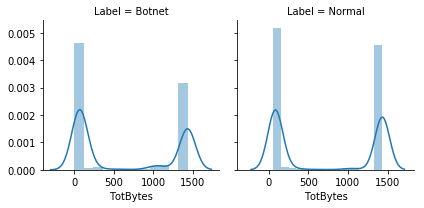

In [8]:
g = sns.FacetGrid(dados, col="Label") 
g.map(sns.distplot, "TotBytes")

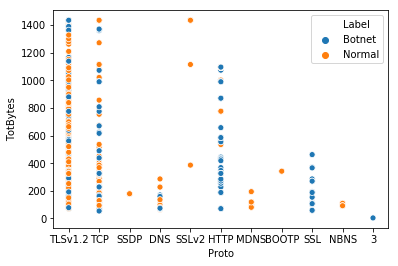

In [9]:
g =sns.scatterplot(x="Proto", y="TotBytes",
              hue="Label",
              data=dados);

#### Selecionado a seção de dados:


In [10]:
Xdata = data[0]
Ydata = data[1]
XdataT = data[2]
YdataT = data[3]

#### Importando módulos para usar os algoritmos de aprendizado de máquina do sklearn:

In [11]:
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


import matplotlib.pyplot as plt

#### Preparando os dados:

In [12]:
DataPreparation.Prepare(Xdata,Ydata,XdataT,YdataT)

<Prepare(Thread-4, initial)>

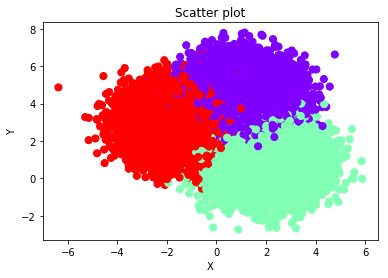

In [13]:
from sklearn.datasets import make_blobs

plotX, plotY = Xdata, Ydata

plotX, plotY = make_blobs(n_samples=30000, centers=3,
                  random_state=0, cluster_std=1.0)
plt.scatter(plotX[:, 0], plotX[:, 1], c=plotY, s=50, cmap='rainbow');
plt.title('Scatter plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Modelo de Floresta aleatória (Random forest)

In [14]:
ini = time.time()

clf = RandomForestClassifier()
clf.fit(Xdata,Ydata)

Prediction = clf.predict(XdataT)
escoreRF = clf.score(XdataT,YdataT)
precisaoRF = precision_score(Prediction,YdataT)
recallRF = recall_score(Prediction,YdataT)
acuraciaRF = accuracy_score(Prediction,YdataT)
F1RF=f1_score(Prediction,YdataT)

fim = time.time()
tempoRF = fim-ini

print("                    Matriz de Confusão")
print(classification_report(YdataT, Prediction))

                    Matriz de Confusão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      5000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



### Modelo de árvore de decisão

In [15]:
ini = time.time()

clf = DecisionTreeClassifier()
clf.fit(Xdata,Ydata)

Prediction = clf.predict(XdataT)
escoreTree = clf.score(XdataT,YdataT)
precisaoTree = precision_score(Prediction,YdataT)
recallTree = recall_score(Prediction,YdataT)
acuraciaTree = accuracy_score(Prediction,YdataT)
F1Tree=f1_score(Prediction,YdataT)

fim = time.time()
tempoTree = fim-ini

print("                    Matriz de Confusão")
print(classification_report(YdataT, Prediction))

                    Matriz de Confusão
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5000
           1       0.99      1.00      0.99      5000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



#### Agrupamento de dados no modelo de árvore de decisão 

In [16]:
from lib import helpers_05_08

helpers_05_08.plot_tree_interactive(plotX, plotY);

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

#### Visualizando a árvores de decisão

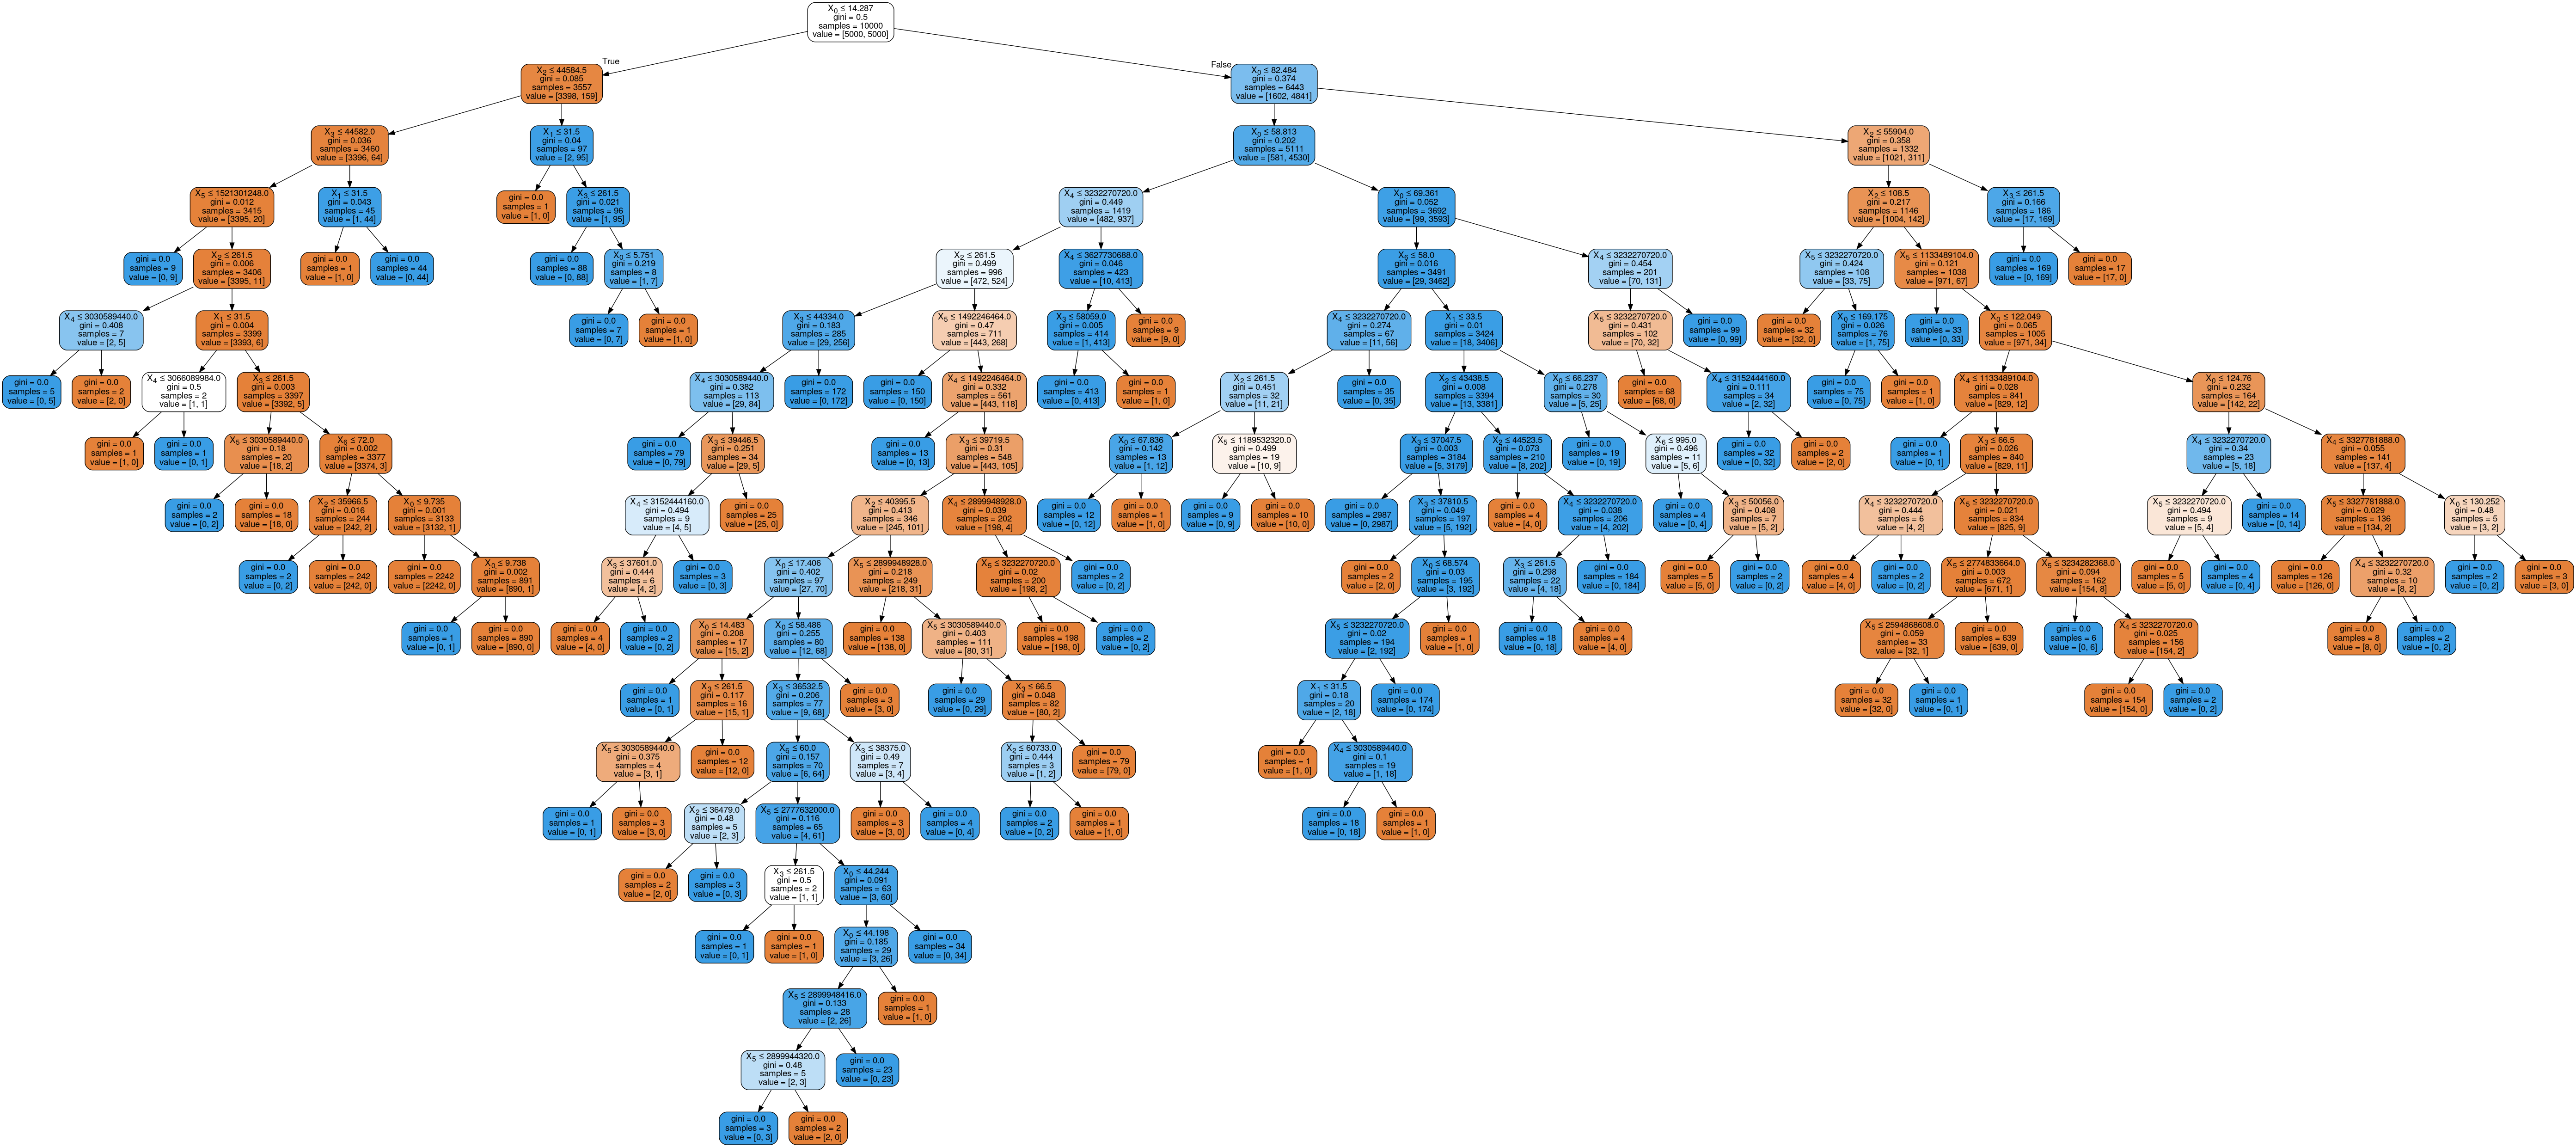

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Modelo Naive Bayes

In [18]:
ini = time.time()

clf = GaussianNB()
clf.fit(Xdata,Ydata)

Prediction = clf.predict(XdataT)
escoreNB = clf.score(XdataT,YdataT)
precisaoNB = precision_score(Prediction,YdataT)
recallNB = recall_score(Prediction,YdataT)
acuraciaNB = accuracy_score(Prediction,YdataT)
F1NB =f1_score(Prediction,YdataT)

fim = time.time()
tempoNB = fim-ini

print("                    Matriz de Confusão")
print(classification_report(YdataT, Prediction))

                    Matriz de Confusão
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      5000
           1       0.92      0.70      0.80      5000

    accuracy                           0.82     10000
   macro avg       0.84      0.82      0.82     10000
weighted avg       0.84      0.82      0.82     10000



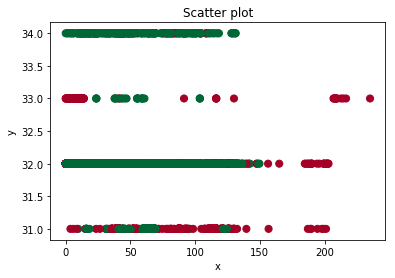

In [19]:
from sklearn.datasets import make_blobs

plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(Xdata[:, 0], Xdata[:, 1], c=Ydata, s=50, cmap='RdYlGn');


### Modelo k-Nearest

In [20]:
ini = time.time()

clf = KNeighborsClassifier()
clf.fit(Xdata,Ydata)

Prediction = clf.predict(XdataT)
escoreKN = clf.score(XdataT,YdataT)
precisaoKN = precision_score(Prediction,YdataT)
recallKN = recall_score(Prediction,YdataT)
acuraciaKN = accuracy_score(Prediction,YdataT)
F1KN=f1_score(Prediction,YdataT)

fim = time.time()
tempoKN = fim-ini

print("                    Matriz de Confusão")
print(classification_report(YdataT, Prediction))

                    Matriz de Confusão
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5000
           1       0.99      0.99      0.99      5000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Modelo de SVM

In [21]:
ini = time.time()

clf = SVC(kernel='rbf')
clf.fit(Xdata,Ydata)

Prediction = clf.predict(XdataT)
escoreSVC = clf.score(XdataT,YdataT)
precisaoSVC = precision_score(Prediction,YdataT)
recallSVC = recall_score(Prediction,YdataT)
acuraciaSVC = accuracy_score(Prediction,YdataT)
F1SVC =f1_score(Prediction,YdataT)

fim = time.time()
tempoSVC = fim-ini

print("                    Matriz de Confusão")
print(classification_report(YdataT, Prediction))

                    Matriz de Confusão
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      5000
           1       0.98      0.71      0.83      5000

    accuracy                           0.85     10000
   macro avg       0.88      0.85      0.85     10000
weighted avg       0.88      0.85      0.85     10000



### Modelo de Análise Discriminante

In [22]:
ini = time.time()

clf = LinearDiscriminantAnalysis()
clf.fit(Xdata,Ydata)

Prediction = clf.predict(XdataT)
escoreAD = clf.score(XdataT,YdataT)
precisaoAD = precision_score(Prediction,YdataT)
recallAD = recall_score(Prediction,YdataT)
acuraciaAD = accuracy_score(Prediction,YdataT)
F1AD=f1_score(Prediction,YdataT)

fim = time.time()
tempoAD = fim-ini

print("                    Matriz de Confusão")
print(classification_report(YdataT, Prediction))

                    Matriz de Confusão
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5000
           1       0.91      0.88      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# ----- Resultados ------

### [+] Acurácia:

In [23]:
print ("Acurácia Floresta aleatória (Random forest): ", acuraciaRF)
print ("Acurácia árvore de decisão: ", acuraciaTree)
print ("Acurácia Naive Bayes: ", acuraciaNB)
print ("Acurácia k-Nearest: ", acuraciaKN)
print ("Acurácia SVM: ", acuraciaSVC)
print ("Acurácia Análise Discriminante: ", acuraciaAD)
print ("Acurácia Análise Discriminante: ", acuraciaSVC)

Acurácia Floresta aleatória (Random forest):  0.9975
Acurácia árvore de decisão:  0.9947
Acurácia Naive Bayes:  0.8226
Acurácia k-Nearest:  0.9939
Acurácia SVM:  0.8501
Acurácia Análise Discriminante:  0.8985
Acurácia Análise Discriminante:  0.8501


### [+] Escore

In [24]:
print ("Escore Floresta aleatória (Random forest): ", escoreRF * 100)
print ("Escore árvore de decisão: ", escoreTree * 100)
print ("Escore Naive Bayes: ", escoreNB * 100)
print ("Escore k-Nearest: ", escoreKN * 100)
print ("Escore SVM: ", escoreSVC * 100)
print ("Escore Análise Discriminante: ", escoreAD * 100)

Escore Floresta aleatória (Random forest):  99.75
Escore árvore de decisão:  99.47
Escore Naive Bayes:  82.26
Escore k-Nearest:  99.39
Escore SVM:  85.00999999999999
Escore Análise Discriminante:  89.85


### [+] Precisão

In [25]:
print ("Precisão Floresta aleatória (Random forest): ", precisaoRF)
print ("Precisão árvore de decisão: ", precisaoTree)
print ("Precisão Naive Bayes: ", precisaoNB)
print ("Precisão k-Nearest: ", precisaoKN)
print ("Precisão SVM: ", precisaoSVC)
print ("Precisão Análise Discriminante: ", precisaoAD)

Precisão Floresta aleatória (Random forest):  0.9972
Precisão árvore de decisão:  0.9954
Precisão Naive Bayes:  0.7024
Precisão k-Nearest:  0.9942
Precisão SVM:  0.715
Precisão Análise Discriminante:  0.8808


### [+] Recall 

In [26]:
print ("Recall Floresta aleatória (Random forest): ", recallRF)
print ("Recall árvore de decisão: ", recallTree)
print ("Recall Naive Bayes: ", recallNB)
print ("Recall k-Nearest: ", recallKN)
print ("Recall SVM: ", recallSVC)
print ("Recall Análise Discriminante: ", recallAD)

Recall Floresta aleatória (Random forest):  0.9977986792075245
Recall árvore de decisão:  0.994008388256441
Recall Naive Bayes:  0.9246972090573986
Recall k-Nearest:  0.9936038376973816
Recall SVM:  0.979720471362017
Recall Análise Discriminante:  0.9131246112378187


### [+] F1 score

In [27]:
print ("F1 score Floresta aleatória (Random forest): ", F1RF)
print ("F1 score árvore de decisão: ", F1Tree)
print ("F1 score Naive Bayes: ", F1NB)
print ("F1 score k-Nearest: ", F1KN)
print ("F1 score SVM: ", F1SVC)
print ("F1 score Análise Discriminante: ", F1AD)

F1 score Floresta aleatória (Random forest):  0.9974992497749324
F1 score árvore de decisão:  0.9947037074048167
F1 score Naive Bayes:  0.7983632643782678
F1 score k-Nearest:  0.9939018294511646
F1 score SVM:  0.8266851659151347
F1 score Análise Discriminante:  0.8966710780820524


In [28]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Modelo", "Acurácia", "Escore", "Precisão", "Recall", "F1 score", "Tempo"]

x.add_row(["Random forest", acuraciaRF, escoreRF * 100, precisaoRF, round(recallRF,3), round(F1RF,3), round(tempoRF,3)])
x.add_row(["Árvore de decisão", acuraciaTree,  escoreTree * 100, precisaoTree, round(recallTree,3), round(F1Tree,3), round(tempoTree,3)])
x.add_row(["Naive Bayes", acuraciaNB, escoreNB * 100, precisaoNB, round(recallNB,3), round(F1NB,3), round(tempoNB,3)])
x.add_row(["k-Nearest", acuraciaKN, escoreKN * 100, precisaoKN, round(recallKN,3), round(F1KN,3), round(tempoKN,3)])
x.add_row(["SVM", acuraciaSVC, round(escoreSVC * 100 ,3), precisaoSVC, round(recallSVC,3), round(F1SVC,3), round(tempoSVC,3)])
x.add_row(["Análise Discriminante", acuraciaAD, escoreAD * 100, precisaoAD, round(recallAD,3), round(F1AD,3), round(tempoAD,3)])

print(x)

+-----------------------+----------+--------+----------+--------+----------+-------+
|         Modelo        | Acurácia | Escore | Precisão | Recall | F1 score | Tempo |
+-----------------------+----------+--------+----------+--------+----------+-------+
|     Random forest     |  0.9975  | 99.75  |  0.9972  | 0.998  |  0.997   |  0.44 |
|   Árvore de decisão   |  0.9947  | 99.47  |  0.9954  | 0.994  |  0.995   | 0.027 |
|      Naive Bayes      |  0.8226  | 82.26  |  0.7024  | 0.925  |  0.798   | 0.016 |
|       k-Nearest       |  0.9939  | 99.39  |  0.9942  | 0.994  |  0.994   | 0.277 |
|          SVM          |  0.8501  | 85.01  |  0.715   |  0.98  |  0.827   | 2.357 |
| Análise Discriminante |  0.8985  | 89.85  |  0.8808  | 0.913  |  0.897   |  0.02 |
+-----------------------+----------+--------+----------+--------+----------+-------+


# [+] Curva de aprendizado

In [29]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [30]:
# Create feature matrix and target vector
#Xdata, Ydata, XdataT, YdataT
X, y = Xdata, Ydata

In [38]:
def CurvaAprend(modelo, nome):
    #Criar notas de treinamento e teste de currículo para vários tamanhos de conjuntos de treinamento
    train_sizes, train_scores, test_scores = learning_curve(modelo(), 
                                                            X, 
                                                            y,
                                                            # Número de dobras na validação cruzada
                                                            cv=50,
                                                            # Métrica de avaliação
                                                            scoring='f1',
                                                            # núcleos do computador -1 = todos
                                                            n_jobs=-1, 
                                                            # 50 tamanhos diferentes do conjunto de treinamento
                                                            train_sizes=np.linspace(0.01, 1.0, 50))

    # Criar médias e desvios padrão das notas dos conjuntos de treinamento
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Criar médias e desvios padrão das pontuações dos conjuntos de testes
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Desenhar linhas
    plt.plot(train_sizes, train_mean, '--', color="#FF0000",  label="Pontuação do treinamento")
    plt.plot(train_sizes, test_mean, color="#81BEF7", label="Pontuação de Teste")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#CEECF5")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#CEECF5")

    # Criar plot
    plt.title("Curva de aprendizado " + nome)
    plt.xlabel("Tamanho do conjunto de treinamento"), plt.ylabel("Pontuação"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

### Curva de aprendizado Floresta aleatória (Random forest)


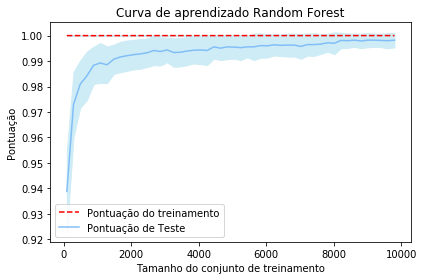

In [39]:
CurvaAprend(RandomForestClassifier, "Random Forest")

### Curva de aprendizado árvore de decisão


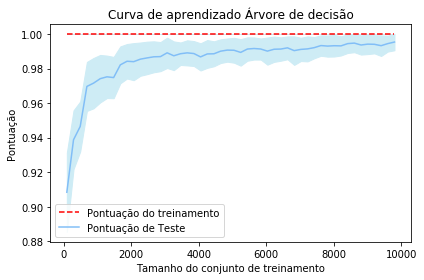

In [40]:
CurvaAprend(DecisionTreeClassifier,"Árvore de decisão")

### Curva de aprendizado Naive Bayes

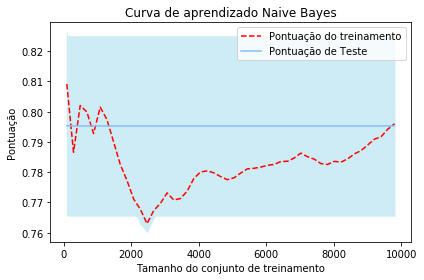

In [41]:
CurvaAprend(GaussianNB, "Naive Bayes")

### Curva de aprendizado k-Nearest

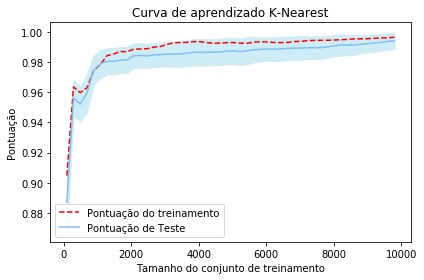

In [42]:
CurvaAprend(KNeighborsClassifier, "K-Nearest")

### Curva de aprendizado SVM

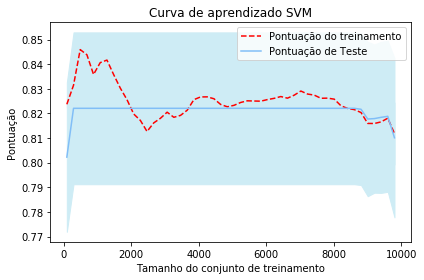

In [43]:
CurvaAprend(SVC, "SVM")

### Curva de aprendizado Análise Discriminante

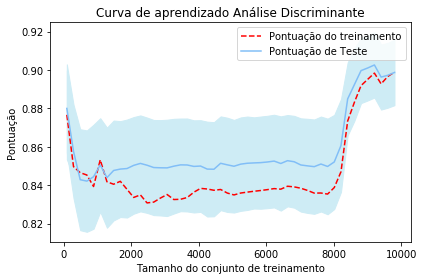

In [44]:
CurvaAprend(LinearDiscriminantAnalysis, "Análise Discriminante")